# Mount to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# My matplotlib personalized style
plt.style.use('ggplot')

plt.rcParams.update({
    "figure.facecolor":  (22/255, 22/255, 22/255, 0.85),
    "figure.figsize": (15, 10),
    "axes.facecolor":    (22/255, 22/255, 22/255, 0.2),  
    "xtick.color": 'lightgrey',
    "ytick.color": 'lightgrey',
    "grid.alpha": 0.1,
    "grid.color": 'salmon',
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "axes.titlecolor": 'lightgrey',
    "axes.labelcolor": 'lightgrey',
    "axes.labelsize": 15,
    "text.color": 'white',
    "axes.titlecolor": "lightgrey",
    "legend.fontsize": 13
})


In [ ]:
PATH = 'drive/MyDrive/SKU12345.csv'

# Visualizing dataset
data = pd.read_csv(PATH)
data.head()

,GTIN,TRANS_DT,UNITS
0,SKU12345,1/1/20,73
1,SKU12345,1/2/20,115
2,SKU12345,1/3/20,155
3,SKU12345,1/4/20,471
4,SKU12345,1/5/20,155


In [ ]:
# Transforming date to pandas datetime for analysis
data['TRANS_DT'] = pd.to_datetime(data['TRANS_DT'])
data.head()

,GTIN,TRANS_DT,UNITS
0,SKU12345,2020-01-01,73
1,SKU12345,2020-01-02,115
2,SKU12345,2020-01-03,155
3,SKU12345,2020-01-04,471
4,SKU12345,2020-01-05,155


In [ ]:
# Transforming dataframe format
data.index = data['TRANS_DT']
data = data.drop(['GTIN', 'TRANS_DT'], axis = 1)
data.head()

,UNITS
TRANS_DT,
2020-01-01,73
2020-01-02,115
2020-01-03,155
2020-01-04,471
2020-01-05,155


In [ ]:
# Data seems like it was collected before the end of December 13th, so drop last row
data.tail()

,UNITS
TRANS_DT,
2021-12-09,299
2021-12-10,359
2021-12-11,578
2021-12-12,379
2021-12-13,14


In [ ]:
data = data.iloc[:-1,:]
data.tail()

,UNITS
TRANS_DT,
2021-12-08,418
2021-12-09,299
2021-12-10,359
2021-12-11,578
2021-12-12,379


In [ ]:
# Finding extra useful parameters
data['MONTH'] = data.index.month_name()
data['DAY'] = data.index.day_name()
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,UNITS,MONTH,DAY
TRANS_DT,,,
2020-01-01,73,January,Wednesday
2020-01-02,115,January,Thursday
2020-01-03,155,January,Friday
2020-01-04,471,January,Saturday
2020-01-05,155,January,Sunday


# Exploratory Data Analysis/Ad Hoc Analysis


Initial Time Series Plot

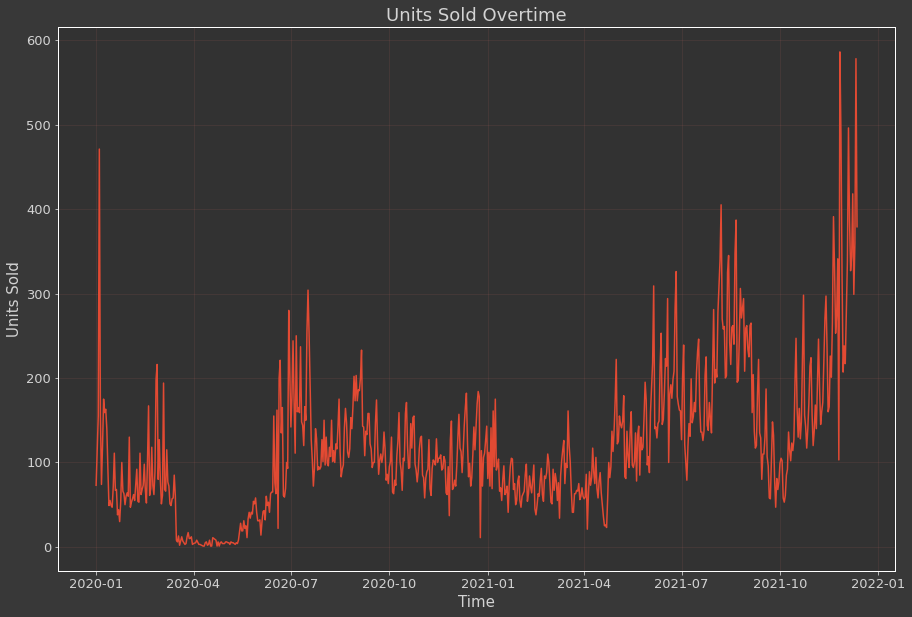

In [ ]:
# Regular Time vs. Units Sold
fig, axs = plt.subplots(figsize = (15, 10))
axs.plot(data.index, data['UNITS'])
axs.set_xlabel('Time')
axs.set_ylabel('Units Sold')
axs.set_title('Units Sold Overtime', size = 18)
fig.show()

Seasonality Plots for Months

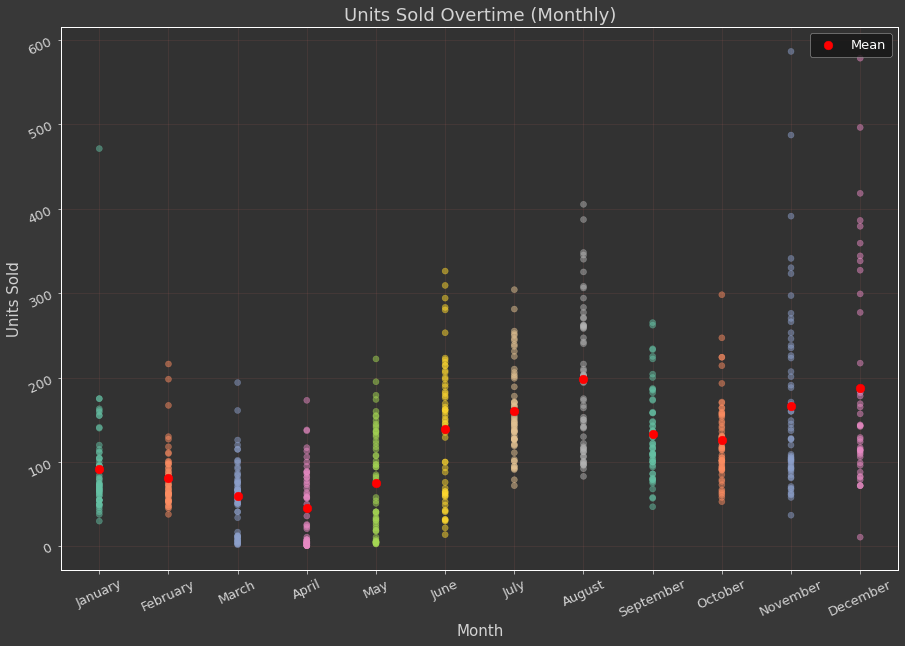

In [ ]:
# Finding any seasonal trends
fig, axs = plt.subplots(figsize = (15, 10))

# Mapping colors
rgb_values = sns.color_palette("Set2", 12)
color_labels = data['MONTH'].unique()
color_map = dict(zip(color_labels, rgb_values))

axs.scatter(data.index.month_name(), data['UNITS'], alpha = 0.5, c = data['MONTH'].map(color_map))
axs.scatter(x = data.groupby(['MONTH']).mean().index, y = data.groupby(['MONTH']).mean()['UNITS'], 
            s = 75, c = 'red', label = 'Mean')
axs.set_xlabel('Month')
axs.set_ylabel('Units Sold')
axs.tick_params(labelrotation=25)
axs.legend()
axs.set_title('Units Sold Overtime (Monthly)', size = 18)
fig.show()

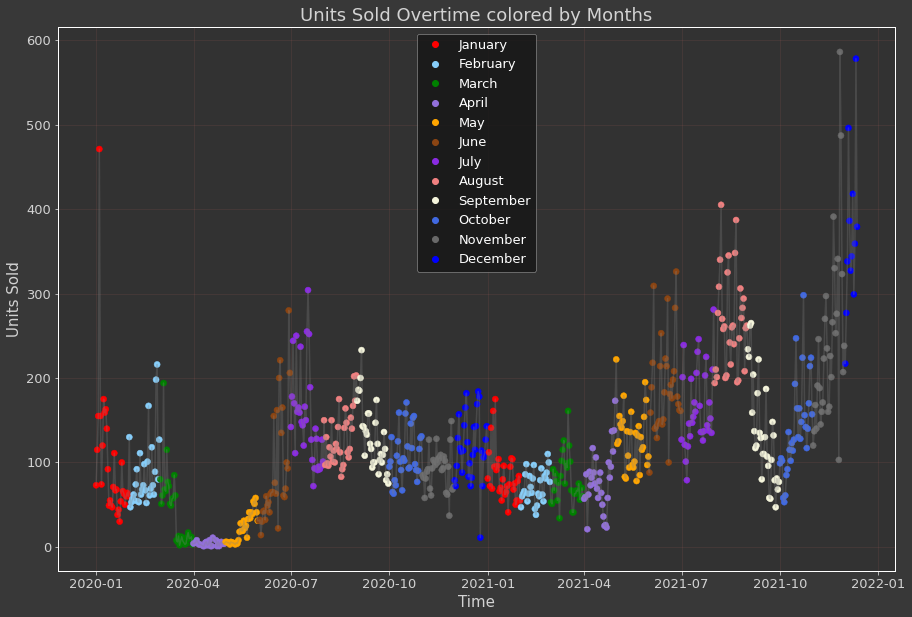

In [ ]:
# Regular Time vs. Units Sold colored by Months
fig, axs = plt.subplots(figsize = (15, 10))

color_map = {}
colors = ['red', 'lightskyblue', 'green', 'mediumpurple', 'orange', 'saddlebrown', 
          'blueviolet', 'lightcoral', 'beige', 'royalblue', 'dimgray', 'blue']

for i in range(12):
  color_map[data['MONTH'].unique()[i]] = colors[i]

axs.scatter(data.index, data['UNITS'], alpha = 1, c = data['MONTH'].map(color_map))
axs.plot(data.index, data['UNITS'], alpha = 0.3, c = 'grey')

axs.set_xlabel('Time')
axs.set_ylabel('Units Sold')
axs.set_title('Units Sold Overtime colored by Months', size = 18)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
plt.legend(markers, color_map.keys(), numpoints=1)
fig.show()

Finding Days with highest number of Sales

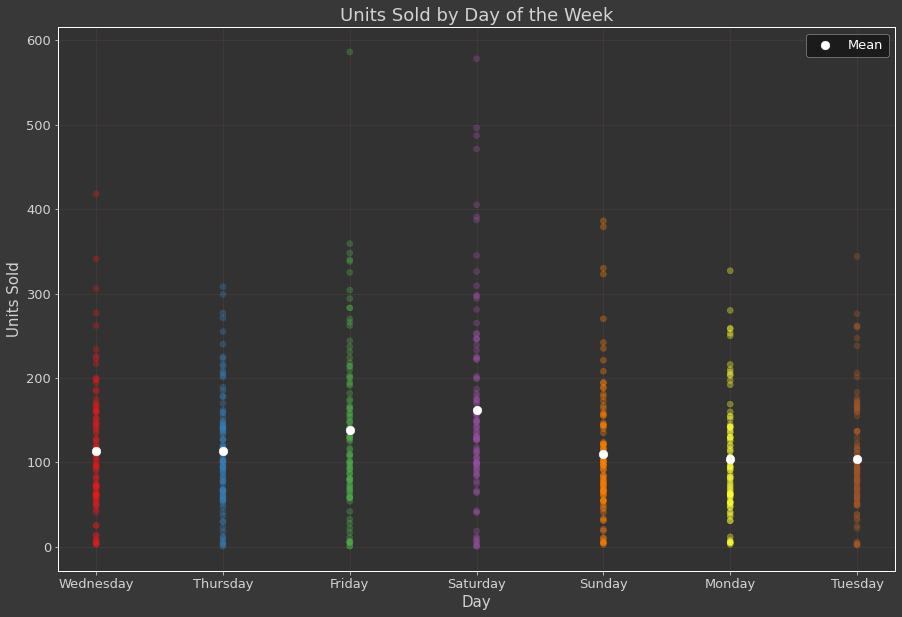

In [ ]:
# Finding most popular days
fig, axs = plt.subplots(figsize = (15, 10))

# Mapping Colors
rgb_values = sns.color_palette("Set1", 7)
color_labels = data['DAY'].unique()
color_map = dict(zip(color_labels, rgb_values))

axs.scatter(data.index.day_name(), data['UNITS'], alpha = 0.35, c = data['DAY'].map(color_map))
axs.scatter(x = data.groupby(['DAY']).mean().index, y = data.groupby(['DAY']).mean()['UNITS'], 
            s = 75, c = 'white', label = 'Mean')
axs.set_xlabel('Day')
axs.set_ylabel('Units Sold')
axs.set_title('Units Sold by Day of the Week', size = 18)
axs.legend()
fig.show()

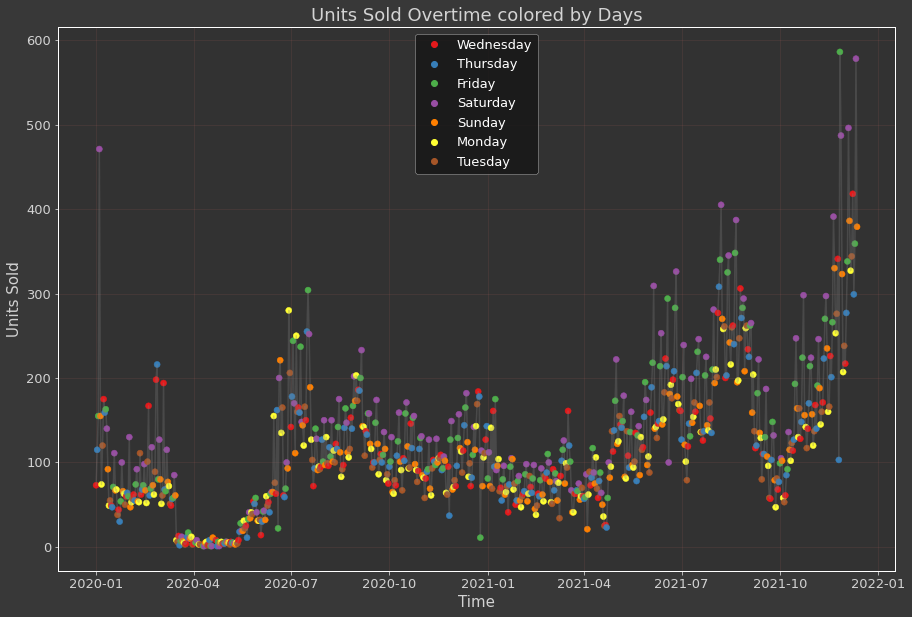

In [ ]:
# Regular Time vs. Units Sold colored by Days
fig, axs = plt.subplots(figsize = (15, 10))

# Mapping Colors
rgb_values = sns.color_palette("Set1", 7)
color_labels = data['DAY'].unique()
color_map = dict(zip(color_labels, rgb_values))

axs.scatter(data.index, data['UNITS'], alpha = 1, c = data['DAY'].map(color_map))
axs.plot(data.index, data['UNITS'], alpha = 0.3, c = 'grey')

axs.set_xlabel('Time')
axs.set_ylabel('Units Sold')
axs.set_title('Units Sold Overtime colored by Days', size = 18)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
plt.legend(markers, color_map.keys(), numpoints=1)
fig.show()

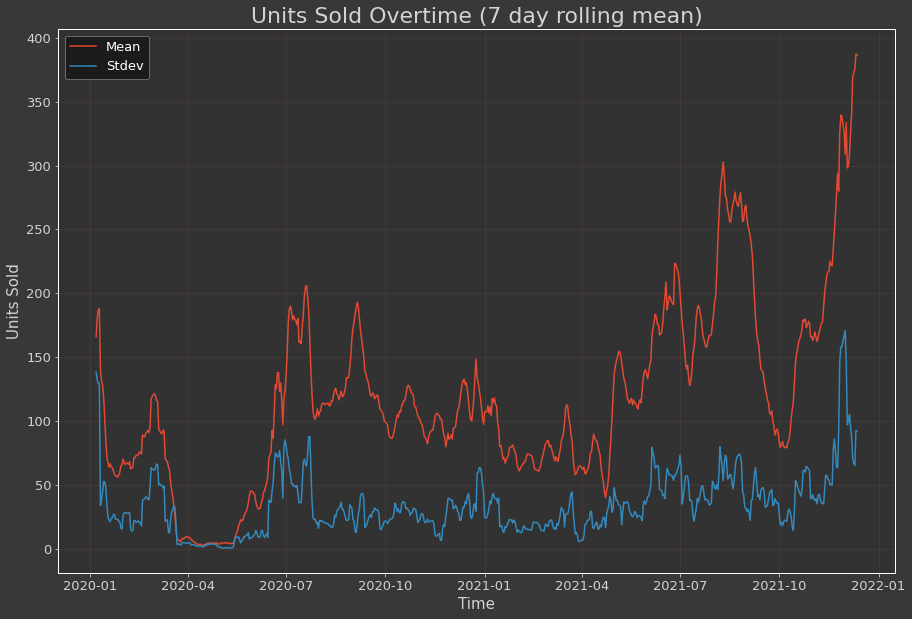

In [ ]:
# Plotting 7 day rolling mean and std
fig, axs = plt.subplots()

rolling_7mean = data['UNITS'].rolling(7).mean()
rolling_7std = data['UNITS'].rolling(7).std()
axs.plot(data.index, rolling_7mean, label = 'Mean')
axs.plot(data.index, rolling_7std, label = 'Stdev')
axs.set_xlabel('Time')
axs.set_ylabel('Units Sold')
axs.set_title('Units Sold Overtime (7 day rolling mean)', size = 22)
axs.legend()
fig.show()

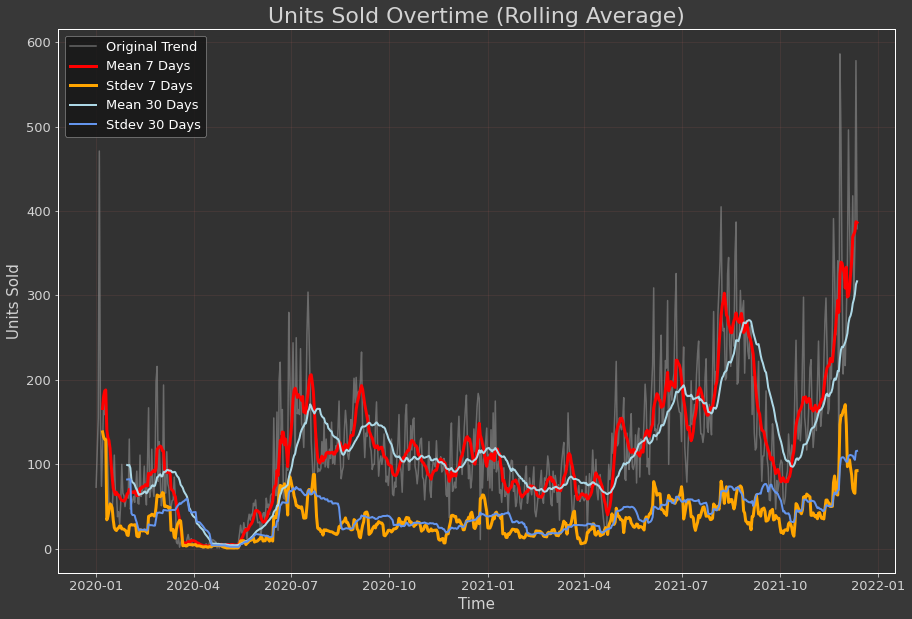

In [ ]:
# Plotting 7 day rolling mean and std and 30 day rolling mean
fig, axs = plt.subplots()

axs.plot(data['UNITS'], alpha = 0.75, label = 'Original Trend', c = 'grey')

rolling_7mean = data['UNITS'].rolling(7).mean()
rolling_7std = data['UNITS'].rolling(7).std()
axs.plot(data.index, rolling_7mean, label = 'Mean 7 Days', lw = 3, c = 'red')
axs.plot(data.index, rolling_7std, label = 'Stdev 7 Days', lw = 3, c = 'orange')

rolling_30mean = data['UNITS'].rolling(30).mean()
rolling_30std = data['UNITS'].rolling(30).std()
axs.plot(data.index, rolling_30mean, label = 'Mean 30 Days', lw = 2, c = 'lightblue')
axs.plot(data.index, rolling_30std, label = 'Stdev 30 Days', lw = 2, c = 'cornflowerblue')

axs.set_xlabel('Time')
axs.set_ylabel('Units Sold')
axs.set_title('Units Sold Overtime (Rolling Average)', size = 22)
axs.legend()
fig.show()

# Non-stationary Time Series

Time Series is non-stationary due to varying statistic measures overtime. 
### Plotting different transformations


Logarithmic Transformation

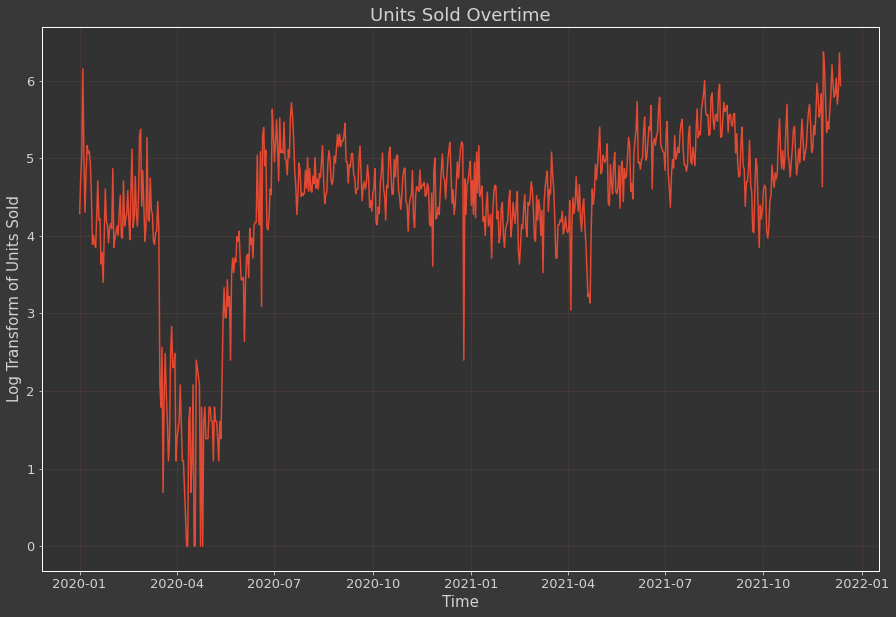

In [ ]:
# Regular Time vs. Units Sold
fig, axs = plt.subplots(figsize = (15, 10))
axs.plot(data.index, np.log(data['UNITS']))
axs.set_xlabel('Time')
axs.set_ylabel('Log Transform of Units Sold')
axs.set_title('Units Sold Overtime', size = 18)
fig.show()

Min-Max Scaler

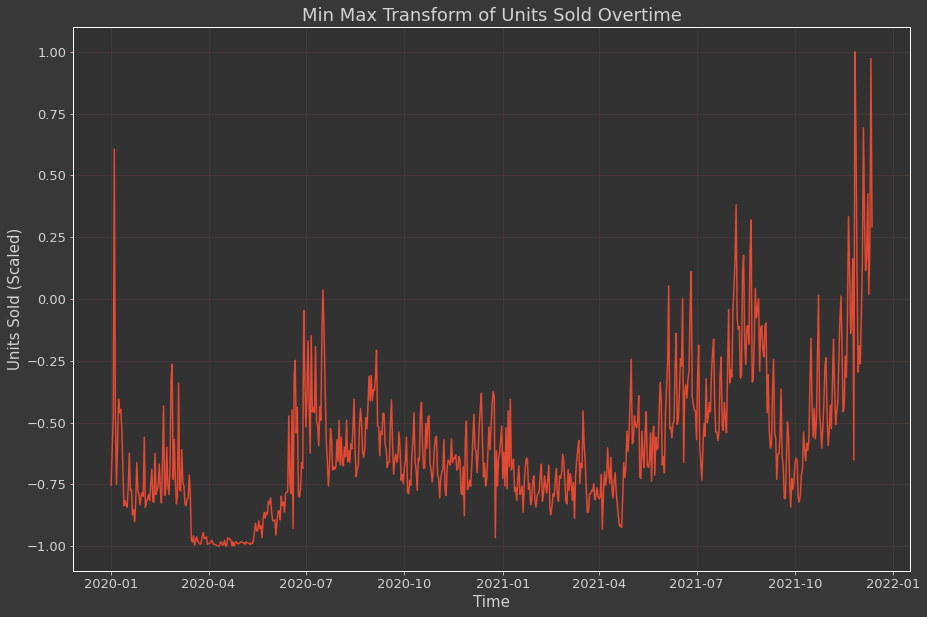

In [ ]:
# Regular Time vs. Units Sold after min max transform
fig, axs = plt.subplots(figsize = (15, 10))
scaling = MinMaxScaler((-1, 1))
axs.plot(data.index, scaling.fit_transform(np.array(data['UNITS']).reshape(-1, 1)))
axs.set_xlabel('Time')
axs.set_ylabel('Units Sold (Scaled)')
axs.set_title('Min Max Transform of Units Sold Overtime', size = 18)
fig.show()

# Modeling Methodology


Any Lag value outside of red region has some predictive power in the time series data. After the 29th lag, there is no significant predictive power on the units sold.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import time
import torch
import torch.nn as nn
from xgboost import XGBRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Creating LSTM class from PyTorch API

In [ ]:
# LSTM class from PyTorch 
class LSTM(nn.Module):
    # Initializing class
    def __init__(self, input_size=1, hidden_size=100):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        
        # LSTM layer that takes in input size and outputs dimension of hidden size
        self.lstm = nn.LSTM(input_size, hidden_size)
        
        # Add a fully-connected layer:
        self.fc = nn.Linear(hidden_size, 1)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1, 1, self.hidden_size),
                       torch.zeros(1, 1, self.hidden_size))

    # Forward pass
    def forward(self, seq):

        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred = self.fc(lstm_out.view(len(seq), -1))
        
        return pred[-1]  # we only want the last value

In [ ]:
def train_test(df, ts):
  """ Creating training and testing data set. 
  Will return train set, scaler object used on training set

  :df: Time Series data with time as index and one column of time series
  :test_size: The amount of data we want to test on
  """
  
  # Create train by splitting on test size
  train_set = df[:-ts].values

  # Scaling our data
  scaler = MinMaxScaler(feature_range=(-1, 1))
  train_norm = scaler.fit_transform(train_set.reshape(-1, 1))

  # Turning to torch tensor
  train_norm = torch.FloatTensor(train_norm).view(-1)

  return train_norm, scaler


def input_data(series, ws): 
    """ This function will create the required input tuple data for the LSTM model

    :series: Input time series data w/ MinMax Scaled
    :ws: The window size for the model's inference 
    """
    
    output_tuples = []

    for i in range(len(series) - ws):
        window = series[i:i + ws]
        prediction = series[i + ws: i + ws + 1]
        output_tuples.append((window, prediction))

    return output_tuples

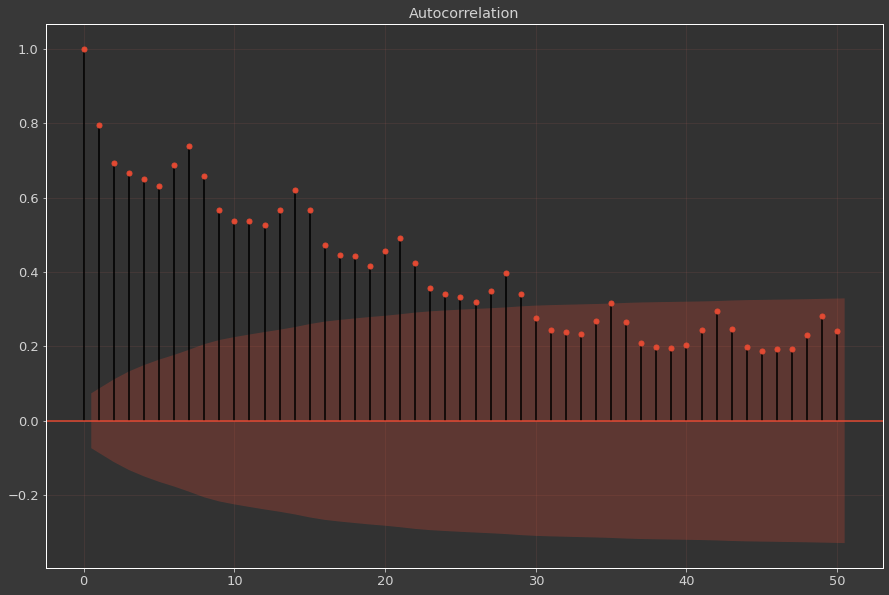

In [ ]:
# Autocorrelation for finding significant lags
plot_acf(x = data['UNITS'], lags=50)
plt.show()

In [ ]:
# Dropping other columns, only used for visualizations
data_model = data.drop(['MONTH', 'DAY'], axis = 1)

data_model.head()

,UNITS
TRANS_DT,
2020-01-01,73
2020-01-02,115
2020-01-03,155
2020-01-04,471
2020-01-05,155


In [ ]:
# Define a test size, choosing 90 because there are about 90 days in a quarter
test_size = 90

# input of dataframe and test size
scaled_train, mm_scaler= train_test(data_model, test_size)

# Define a window size, basing of autocorrelation graph 
# (from PACF graph around 30 values until non-significant lags)
window_size = 30

# getting training set from input data function
train_data = input_data(scaled_train, window_size)

### Training LSTM model

*For future analyses, need to run a thorough hyper-parameter tuning*
 
 Changing learning rate, epochs, window size, etc...

In [ ]:
torch.manual_seed(0)
model = LSTM()

criterion = nn.MSELoss()

# Using an Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

epochs = 101

start_time = time.time()

for i in range(epochs):
    
    # extract sequence data and prediction values from training set
    for seq, y_train in train_data:
        
        # Reset params and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        # Loss criteria
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    if i%10 == 0:
      print(f'Epoch: {i+1} Loss: {loss.item()}')
    
print(f'\nDuration: {time.time() - start_time} seconds')

Epoch: 1 Loss: 0.14062875509262085
Epoch: 11 Loss: 0.022538401186466217
Epoch: 21 Loss: 0.00047279431601054966
Epoch: 31 Loss: 1.1333323527651373e-05
Epoch: 41 Loss: 2.0757952370331623e-05
Epoch: 51 Loss: 0.0013854261487722397
Epoch: 61 Loss: 0.0007683094008825719
Epoch: 71 Loss: 0.0006836005486547947
Epoch: 81 Loss: 0.001219827332533896
Epoch: 91 Loss: 1.601246566451664e-07
Epoch: 101 Loss: 0.0001699539425317198

Duration: 435.62550687789917 seconds


In [ ]:
torch.manual_seed(0)
model2 = LSTM()

criterion = nn.MSELoss()

# Using an Adam optimizer
optimizer = torch.optim.Adam(model2.parameters(), lr=0.0005)

epochs = 301

start_time = time.time()

for i in range(epochs):
    
    # extract sequence data and prediction values from training set
    for seq, y_train in train_data:
        
        # Reset params and hidden states
        optimizer.zero_grad()
        model2.hidden = (torch.zeros(1,1,model2.hidden_size),
                        torch.zeros(1,1,model2.hidden_size))
        
        y_pred = model2(seq)
        
        # Loss criteria
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    if i%10 == 0:
      print(f'Epoch: {i+1} Loss: {loss.item()}')
    
print(f'\nDuration: {time.time() - start_time} seconds')

Epoch: 1 Loss: 0.14062875509262085
Epoch: 11 Loss: 0.022538401186466217
Epoch: 21 Loss: 0.00047279431601054966
Epoch: 31 Loss: 1.1333323527651373e-05
Epoch: 41 Loss: 2.0757952370331623e-05
Epoch: 51 Loss: 0.0013854261487722397
Epoch: 61 Loss: 0.0007683094008825719
Epoch: 71 Loss: 0.0006836005486547947
Epoch: 81 Loss: 0.001219827332533896
Epoch: 91 Loss: 1.601246566451664e-07
Epoch: 101 Loss: 0.0001699539425317198
Epoch: 111 Loss: 0.000890058814547956
Epoch: 121 Loss: 0.0017963983118534088
Epoch: 131 Loss: 0.00034598057391121984
Epoch: 141 Loss: 0.0009474241524003446
Epoch: 151 Loss: 0.00105331523809582
Epoch: 161 Loss: 0.0005611462402157485
Epoch: 171 Loss: 0.0009482737514190376
Epoch: 181 Loss: 7.041176286293194e-05
Epoch: 191 Loss: 0.0021725113037973642
Epoch: 201 Loss: 0.006864129099994898
Epoch: 211 Loss: 1.8604729120852426e-05
Epoch: 221 Loss: 0.00034884465276263654
Epoch: 231 Loss: 0.006670176517218351
Epoch: 241 Loss: 2.306138412677683e-05
Epoch: 251 Loss: 0.0005193983670324087


### Predictions for LSTM

In [ ]:
future = 90

# Add the last window of training values to the list of predictions
preds = scaled_train[-window_size:].tolist()

# Set the model to evaluation mode
model.eval()

for i in range(future):

    seq = torch.FloatTensor(preds[-window_size:])
    
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        preds.append(model(seq).item())

# Inverse Transformation
true_predictions = mm_scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))

In [ ]:
future = 90

# Add the last window of training values to the list of predictions
preds = scaled_train[-window_size:].tolist()

# Set the model to evaluation mode
model2.eval()

for i in range(future):

    seq = torch.FloatTensor(preds[-window_size:])
    
    with torch.no_grad():
        model2.hidden = (torch.zeros(1,1,model2.hidden_size),
                         torch.zeros(1,1,model2.hidden_size))
        
        preds.append(model(seq).item())

# Inverse Transformation
true_predictions2 = mm_scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))

### Training XGB Regression Model

In [ ]:
# Creating data set for XGB
xgb_data = data_model.copy()

# Transforming datetime index into all numerical values
xgb_data['quarter'] = data.index.quarter
xgb_data['month'] = data.index.month
xgb_data['year'] = data.index.year
xgb_data['dayofyear'] = data.index.dayofyear
xgb_data['dayofmonth'] = data.index.day
xgb_data['weekofyear'] = data.index.weekofyear

xgb_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # Remove the CWD from sys.path while we load stuff.


,UNITS,quarter,month,year,dayofyear,dayofmonth,weekofyear
TRANS_DT,,,,,,,
2020-01-01,73,1,1,2020,1,1,1
2020-01-02,115,1,1,2020,2,2,1
2020-01-03,155,1,1,2020,3,3,1
2020-01-04,471,1,1,2020,4,4,1
2020-01-05,155,1,1,2020,5,5,1


[01:05:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


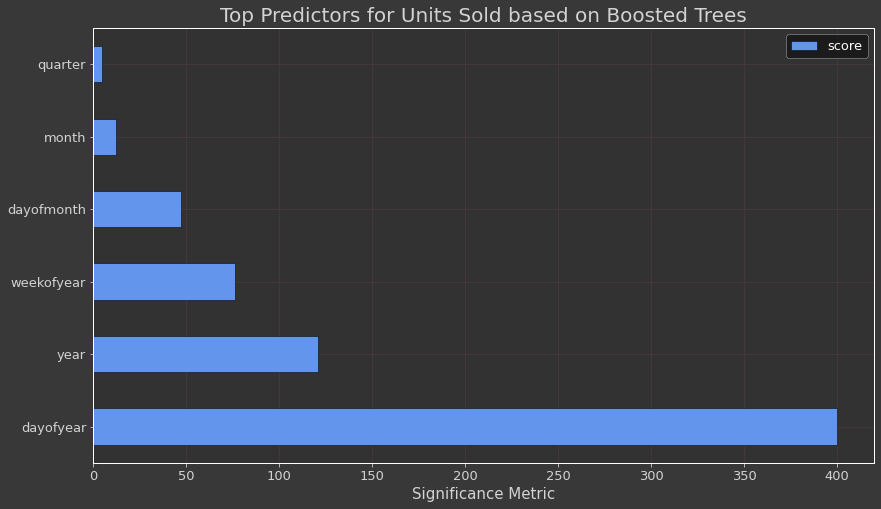

In [ ]:
# Creating x and y for building our XGB model 
x = xgb_data.drop(['UNITS'], axis = 1)
y = xgb_data['UNITS']

# Training on only the data before the test size
xgb_train_x = x.iloc[:-test_size, :]
xgb_train_y = y[:-test_size]

# Creating and fitting our model on training data
xgb_model = XGBRegressor()
xgb_model.fit(xgb_train_x, xgb_train_y)


# Finding and plotting feature importance
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

# Plotting the XGB model's most important features
data_overlimit = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_overlimit.nlargest(15, columns="score").plot(kind='barh', figsize = (14,8), color = 'cornflowerblue', edgecolor='black') 
plt.xlabel('Significance Metric')
plt.title('Top Predictors for Units Sold based on Boosted Trees', size = 20)
plt.show()

### Predictions for XGB Model

In [ ]:
# Using the XGB model for predicted the Q4 for 2021
xgb_preds = xgb_model.predict(xgb_data.drop(['UNITS'], axis = 1).iloc[-test_size:, :])

# Visualizing Q4 of 2021 Predictions 

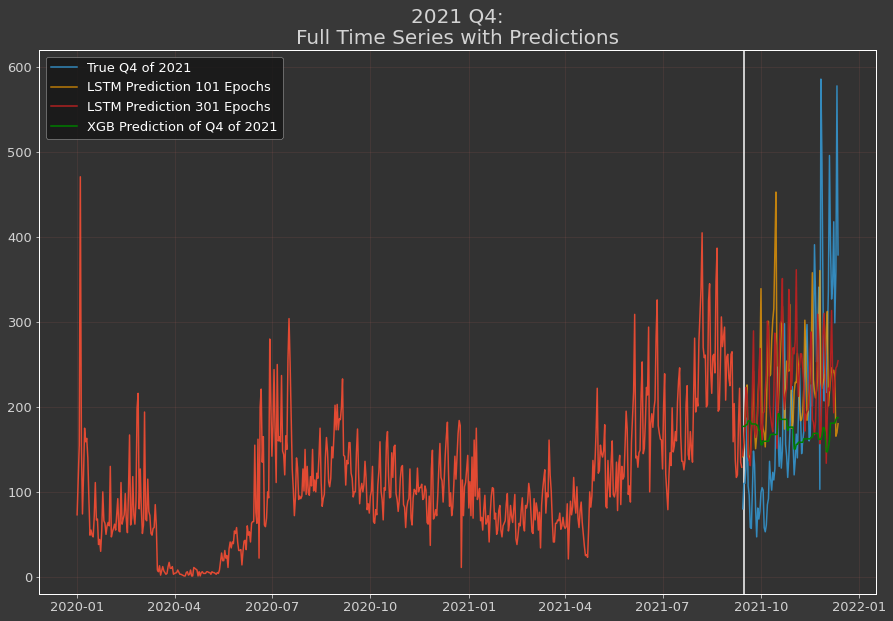

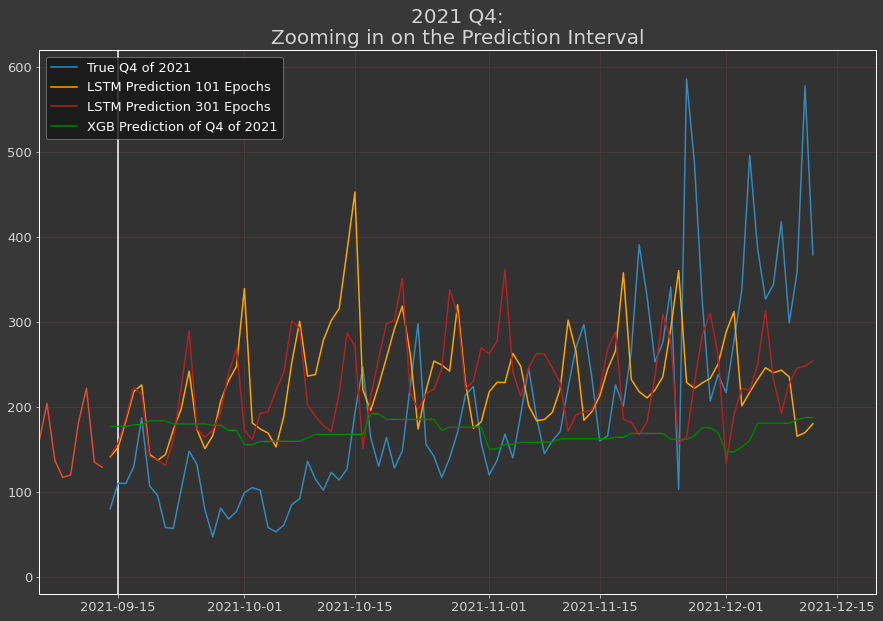

In [ ]:
# Full Time Series Visualization
fig, axs = plt.subplots()
axs.plot(data_model[:-test_size], label = '')
axs.plot(data_model.index[-test_size:].values, data_model['UNITS'][-test_size:], label = 'True Q4 of 2021')
axs.plot(data_model.index[-test_size:].values, true_predictions, label = 'LSTM Prediction 101 Epochs', c = 'orange', alpha = 0.7)
axs.plot(data_model.index[-test_size:].values, true_predictions2, label = 'LSTM Prediction 301 Epochs', c = 'firebrick')
axs.plot(data_model.index[-test_size:].values, xgb_preds, label = 'XGB Prediction of Q4 of 2021', c = 'green')

# Creating vertical line, setting y lim for better explanatory power
axs.vlines(pd.to_datetime('2021-09-15'), ymin = -100, ymax = 650, color = 'White')
axs.set_ylim(-20, 620)
axs.set_title('2021 Q4:\nFull Time Series with Predictions', size = 20)
axs.legend()
fig.show()


# Zooming in on Prediction Interval (JUST ADDING AN X LIMITER)
fig, axs = plt.subplots()
axs.plot(data_model[:-test_size], label = '')
axs.plot(data_model.index[-test_size:].values, data_model['UNITS'][-test_size:], label = 'True Q4 of 2021')
axs.plot(data_model.index[-test_size:].values, true_predictions, label = 'LSTM Prediction 101 Epochs', c = 'orange')
axs.plot(data_model.index[-test_size:].values, true_predictions2, label = 'LSTM Prediction 301 Epochs', c = 'firebrick')
axs.plot(data_model.index[-test_size:].values, xgb_preds, label = 'XGB Prediction of Q4 of 2021', c = 'green')

axs.vlines(pd.to_datetime('2021-09-15'), ymin = -100, ymax = 650, color = 'White')
axs.set_ylim(-20, 620)
axs.set_xlim(xmin = pd.to_datetime('2021-09-5'), xmax = pd.to_datetime('2021-12-20'))
axs.set_title('2021 Q4:\nZooming in on the Prediction Interval', size = 20)
axs.legend()
fig.show()

# Future values

We need to predict sales for the first quarter of 2022, our latest date in the given dataset is 12/12/2021, so we need an extra 19 days + 90 days of next quarter.

*We will predict 109 days into the future.*

In [ ]:
(pd.to_datetime('12-31-2021') - pd.to_datetime('12-12-2021'))

Timedelta('19 days 00:00:00')

In [ ]:
# Creatine dates for 109 days into the future
start_date = pd.to_datetime('2021-12-12')

extra_dates = []
iter = 0

# Creating a while loop to get all days after where the date ends
# 109 days was calculated because of 19 days until next year + 90 days quarter
while iter < 109:
    start_date += timedelta(days = 1)
    extra_dates.append(start_date)
    iter += 1

print(extra_dates[:5])
print(extra_dates[-5:])

[Timestamp('2021-12-13 00:00:00'), Timestamp('2021-12-14 00:00:00'), Timestamp('2021-12-15 00:00:00'), Timestamp('2021-12-16 00:00:00'), Timestamp('2021-12-17 00:00:00')]
[Timestamp('2022-03-27 00:00:00'), Timestamp('2022-03-28 00:00:00'), Timestamp('2022-03-29 00:00:00'), Timestamp('2022-03-30 00:00:00'), Timestamp('2022-03-31 00:00:00')]


### Training new LSTM model on full dataset

In [ ]:
# Scaling our data
scaler_future = MinMaxScaler(feature_range=(-1, 1))
scaled_train_future = scaler_future.fit_transform(np.array(data_model['UNITS']).reshape(-1, 1))

scaled_train_future = torch.FloatTensor(scaled_train_future).view(-1)

# Define a window size, basing of autocorrelation graph 
# (from PACF graph around 30 values until non-significant lags)
window_size = 30

# getting training set from input data function
train_data_future = input_data(scaled_train_future, window_size)

In [ ]:
torch.manual_seed(0)
model_full = LSTM()

criterion = nn.MSELoss()

# Using an Adam optimizer
optimizer = torch.optim.Adam(model_full.parameters(), lr=0.0005)

epochs = 151

start_time = time.time()

for i in range(epochs):
    
    # extract sequence data and prediction values from training set
    for seq, y_train in train_data_future:
        
        # Reset params and hidden states
        optimizer.zero_grad()
        model_full.hidden = (torch.zeros(1,1,model_full.hidden_size),
                             torch.zeros(1,1,model_full.hidden_size))
        
        y_pred_future = model_full(seq)
        
        # Loss criteria
        loss = criterion(y_pred_future, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    if i%10 == 0:
      print(f'Epoch: {i+1} Loss: {loss.item()}')
    
print(f'\nDuration: {time.time() - start_time} seconds')

Epoch: 1 Loss: 0.1315339356660843
Epoch: 11 Loss: 0.1925126016139984
Epoch: 21 Loss: 0.10812452435493469
Epoch: 31 Loss: 0.0009735269122757018
Epoch: 41 Loss: 0.021335074678063393
Epoch: 51 Loss: 0.00500859459862113
Epoch: 61 Loss: 0.000195165557670407
Epoch: 71 Loss: 9.065979975275695e-05
Epoch: 81 Loss: 0.0017639044672250748
Epoch: 91 Loss: 0.07492629438638687
Epoch: 101 Loss: 0.0012613688595592976
Epoch: 111 Loss: 0.000277642160654068
Epoch: 121 Loss: 0.001456726691685617
Epoch: 131 Loss: 0.011636980809271336
Epoch: 141 Loss: 0.005663320422172546
Epoch: 151 Loss: 0.00010485736856935546

Duration: 767.9677186012268 seconds


In [ ]:
torch.manual_seed(0)
model_future = LSTM()

criterion = nn.MSELoss()

# Using an Adam optimizer
optimizer = torch.optim.Adam(model_future.parameters(), lr=0.0005)

epochs = 301

start_time = time.time()

for i in range(epochs):
    
    # extract sequence data and prediction values from training set
    for seq, y_train in train_data_future:
        
        # Reset params and hidden states
        optimizer.zero_grad()
        model_future.hidden = (torch.zeros(1,1,model_future.hidden_size),
                             torch.zeros(1,1,model_future.hidden_size))
        
        y_pred_future = model_future(seq)
        
        # Loss criteria
        loss = criterion(y_pred_future, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    if i%10 == 0:
      print(f'Epoch: {i+1} Loss: {loss.item()}')
    
print(f'\nDuration: {time.time() - start_time} seconds')

Epoch: 1 Loss: 0.1315339356660843
Epoch: 11 Loss: 0.1925126016139984
Epoch: 21 Loss: 0.10812452435493469
Epoch: 31 Loss: 0.0009735269122757018
Epoch: 41 Loss: 0.021335074678063393
Epoch: 51 Loss: 0.00500859459862113
Epoch: 61 Loss: 0.000195165557670407
Epoch: 71 Loss: 9.065979975275695e-05
Epoch: 81 Loss: 0.0017639044672250748
Epoch: 91 Loss: 0.07492629438638687
Epoch: 101 Loss: 0.0012613688595592976
Epoch: 111 Loss: 0.000277642160654068
Epoch: 121 Loss: 0.001456726691685617
Epoch: 131 Loss: 0.011636980809271336
Epoch: 141 Loss: 0.005663320422172546
Epoch: 151 Loss: 0.00010485736856935546
Epoch: 161 Loss: 1.4931342775525991e-05
Epoch: 171 Loss: 0.0006132026319392025
Epoch: 181 Loss: 0.0003929223748855293
Epoch: 191 Loss: 0.0007282363367266953
Epoch: 201 Loss: 0.0013055801391601562
Epoch: 211 Loss: 3.556978072083439e-07
Epoch: 221 Loss: 1.934046667884104e-05
Epoch: 231 Loss: 0.00040534083382226527
Epoch: 241 Loss: 4.94218802487012e-05
Epoch: 251 Loss: 0.00223413179628551
Epoch: 261 Loss

In [ ]:
# 109 days into the Future
future = 109

# Add the last window of training values to the list of predictions
preds = scaled_train_future[-window_size:].tolist()

# Set the model to evaluation mode
model_full.eval()

for i in range(future):

    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():
        model_full.hidden = (torch.zeros(1,1,model_full.hidden_size),
                             torch.zeros(1,1,model_full.hidden_size))
        
        preds.append(model_full(seq).item())

# Inverse Transformation
future_predictions = scaler_future.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))

In [ ]:
# 109 days into the Future
future = 109

# Add the last window of training values to the list of predictions
preds = scaled_train_future[-window_size:].tolist()

# Set the model to evaluation mode
model_future.eval()

for i in range(future):

    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():
        model_future.hidden = (torch.zeros(1,1,model_future.hidden_size),
                               torch.zeros(1,1,model_future.hidden_size))
        
        preds.append(model_future(seq).item())

# Inverse Transformation
future_predictions2 = scaler_future.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))

In [ ]:
lstm_future_preds = pd.DataFrame(future_predictions, index = extra_dates)

In [ ]:
lstm_future_preds2 = pd.DataFrame(future_predictions2, index = extra_dates)

### XGB Model Training on full dataset

[01:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


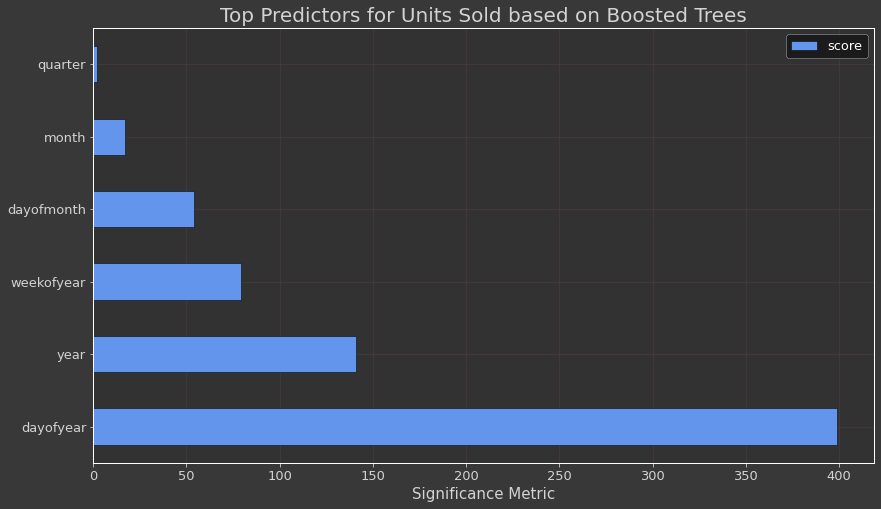

In [ ]:
# Creating XGB model for full data set
xgb_full = XGBRegressor()

xgb_full.fit(x, y)

feature_important = xgb_full.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data_overlimit = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_overlimit.nlargest(15, columns="score").plot(kind='barh', figsize = (14,8), color = 'cornflowerblue', edgecolor='black') 
plt.xlabel('Significance Metric')
plt.title('Top Predictors for Units Sold based on Boosted Trees', size = 20)
plt.show()

### XGB Model Predictions

To use our XGB model for predicting the future, we need the future time values

In [ ]:
# Creating dataframe for XGB model's future predictions
xgb_future_data = pd.DataFrame(index = extra_dates)

xgb_future_data['quarter'] = xgb_future_data.index.quarter
xgb_future_data['month'] = xgb_future_data.index.month
xgb_future_data['year'] = xgb_future_data.index.year
xgb_future_data['dayofyear'] = xgb_future_data.index.dayofyear
xgb_future_data['dayofmonth'] = xgb_future_data.index.day
xgb_future_data['weekofyear'] = xgb_future_data.index.weekofyear

xgb_future_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  if __name__ == '__main__':


,quarter,month,year,dayofyear,dayofmonth,weekofyear
2021-12-13,4,12,2021,347,13,50
2021-12-14,4,12,2021,348,14,50
2021-12-15,4,12,2021,349,15,50
2021-12-16,4,12,2021,350,16,50
2021-12-17,4,12,2021,351,17,50


In [ ]:
# Predicting using our new dataframe
xgb_future_preds = xgb_model.predict(xgb_future_data)

In [ ]:
xgb_future_preds = pd.DataFrame(xgb_future_preds, index = xgb_future_data.index)

# Visualizing the next Quarter Sales

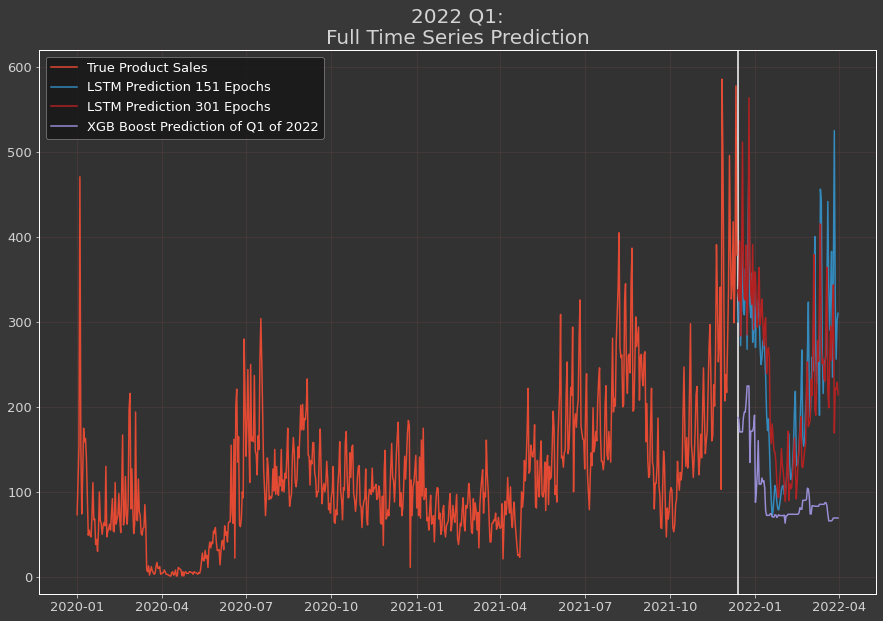

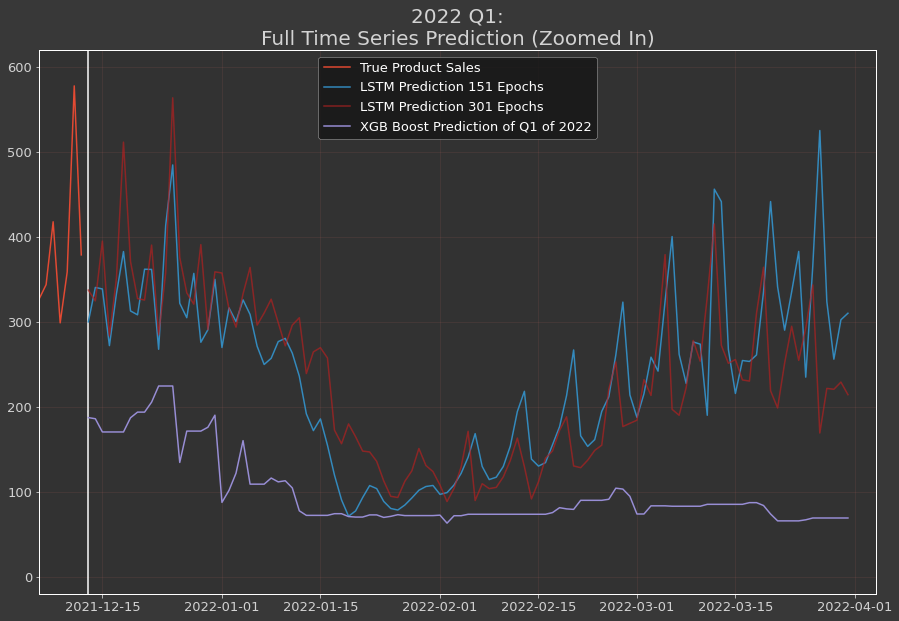

In [ ]:
# Full Time Series Visualization
fig, axs = plt.subplots()
axs.plot(data_model.index.values, data_model['UNITS'], label = 'True Product Sales')
axs.plot(lstm_future_preds, label = 'LSTM Prediction 151 Epochs')
axs.plot(lstm_future_preds2, label = 'LSTM Prediction 301 Epochs', color = 'firebrick')
axs.plot(xgb_future_preds, label = 'XGB Boost Prediction of Q1 of 2022')

axs.set_title('2022 Q1:\nFull Time Series Prediction', size = 20)
axs.vlines(pd.to_datetime('2021-12-13'), ymin = -100, ymax = 650, color = 'White')
axs.set_ylim(-20, 620)
axs.legend()
fig.show()

# Zooming in on Prediction Interval for Q1 2022 (JUST ADDING AN X LIMITER)
fig, axs = plt.subplots()
axs.plot(data_model.index.values, data_model['UNITS'], label = 'True Product Sales')
axs.plot(lstm_future_preds, label = 'LSTM Prediction 151 Epochs')
axs.plot(lstm_future_preds2, label = 'LSTM Prediction 301 Epochs', color = 'firebrick', alpha = 0.7)
axs.plot(xgb_future_preds, label = 'XGB Boost Prediction of Q1 of 2022')

axs.set_title('2022 Q1:\nFull Time Series Prediction (Zoomed In)', size = 20)
axs.vlines(pd.to_datetime('2021-12-13'), ymin = -100, ymax = 650, color = 'White')
axs.set_ylim(-20, 620)
axs.set_xlim(xmin = pd.to_datetime('2021-12-06'), xmax = pd.to_datetime('2022-04-04'))
axs.legend()
fig.show()

# Interpreting Results

In [ ]:
data_model.head()

,UNITS
TRANS_DT,
2020-01-01,73
2020-01-02,115
2020-01-03,155
2020-01-04,471
2020-01-05,155


In [ ]:
q1 = pd.DataFrame((lstm_future_preds[0] + lstm_future_preds2[0])/2)
q1.columns = ['UNITS']
q1.head()

,UNITS
2021-12-13,318.862652
2021-12-14,332.771949
2021-12-15,367.086328
2021-12-16,277.869349
2021-12-17,342.420688


In [ ]:
post_model_df = data_model.append(q1)
post_model_df

,UNITS
2020-01-01,73.000000
2020-01-02,115.000000
2020-01-03,155.000000
2020-01-04,471.000000
2020-01-05,155.000000
...,...
2022-03-27,347.353740
2022-03-28,272.864129
2022-03-29,238.521936
2022-03-30,265.944314


In [ ]:
# Finding extra useful parameters
post_model_df['MONTH'] = post_model_df.index.month_name()
post_model_df['DAY'] = post_model_df.index.day_name()
post_model_df.head()

,UNITS,MONTH,DAY
2020-01-01,73.0,January,Wednesday
2020-01-02,115.0,January,Thursday
2020-01-03,155.0,January,Friday
2020-01-04,471.0,January,Saturday
2020-01-05,155.0,January,Sunday


## Exploratory Data Analysis with predicted 2022 Q1 Data

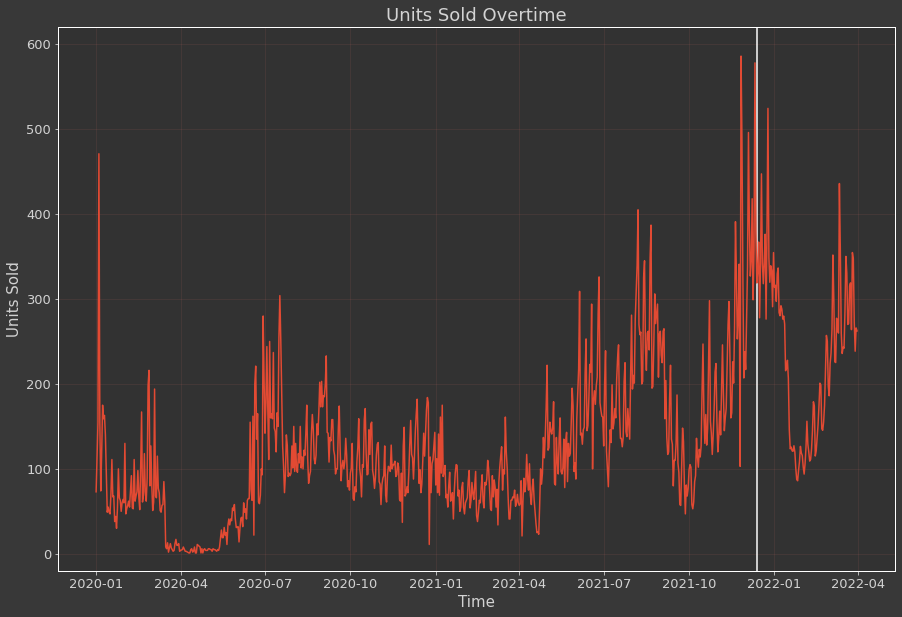

In [ ]:
# Regular Time vs. Units Sold
fig, axs = plt.subplots(figsize = (15, 10))
axs.plot(post_model_df.index, post_model_df['UNITS'])
axs.set_xlabel('Time')
axs.set_ylabel('Units Sold')
axs.set_title('Units Sold Overtime', size = 18)
axs.vlines(pd.to_datetime('2021-12-13'), ymin = -100, ymax = 650, color = 'White')
axs.set_ylim(-20, 620)
fig.show()

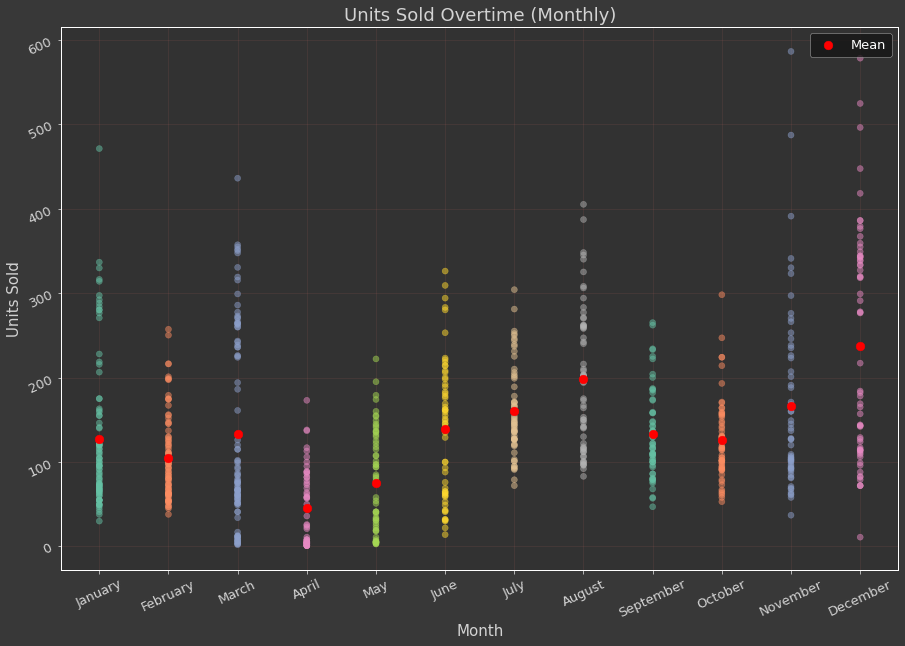

In [91]:
# Finding any seasonal trends
fig, axs = plt.subplots(figsize = (15, 10))

# Mapping colors
rgb_values = sns.color_palette("Set2", 12)
color_labels = post_model_df['MONTH'].unique()
color_map = dict(zip(color_labels, rgb_values))

axs.scatter(post_model_df.index.month_name(), post_model_df['UNITS'], alpha = 0.5, c = post_model_df['MONTH'].map(color_map))
axs.scatter(x = post_model_df.groupby(['MONTH']).mean().index, y = post_model_df.groupby(['MONTH']).mean()['UNITS'], 
            s = 75, c = 'red', label = 'Mean')
axs.set_xlabel('Month')
axs.set_ylabel('Units Sold')
axs.tick_params(labelrotation=25)
axs.legend()
axs.set_title('Units Sold Overtime (Monthly)', size = 18)
fig.show()

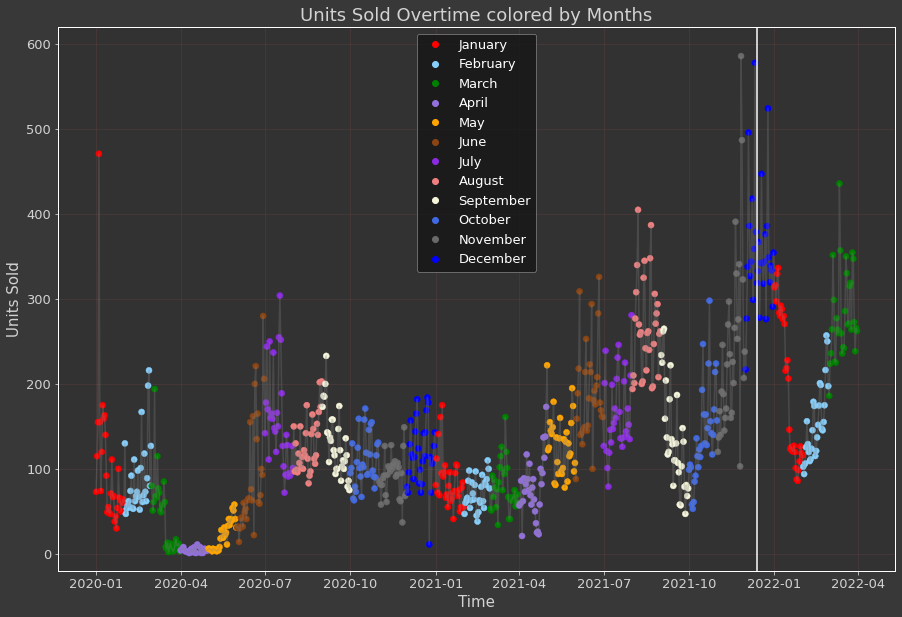

In [92]:
# Regular Time vs. Units Sold colored by Months
fig, axs = plt.subplots(figsize = (15, 10))

color_map = {}
colors = ['red', 'lightskyblue', 'green', 'mediumpurple', 'orange', 'saddlebrown', 
          'blueviolet', 'lightcoral', 'beige', 'royalblue', 'dimgray', 'blue']

for i in range(12):
  color_map[post_model_df['MONTH'].unique()[i]] = colors[i]

axs.scatter(post_model_df.index, post_model_df['UNITS'], alpha = 1, c = post_model_df['MONTH'].map(color_map))
axs.plot(post_model_df.index, post_model_df['UNITS'], alpha = 0.3, c = 'grey')

axs.set_xlabel('Time')
axs.set_ylabel('Units Sold')
axs.set_title('Units Sold Overtime colored by Months', size = 18)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
axs.vlines(pd.to_datetime('2021-12-13'), ymin = -100, ymax = 650, color = 'White')
axs.set_ylim(-20, 620)
plt.legend(markers, color_map.keys(), numpoints=1)
fig.show()

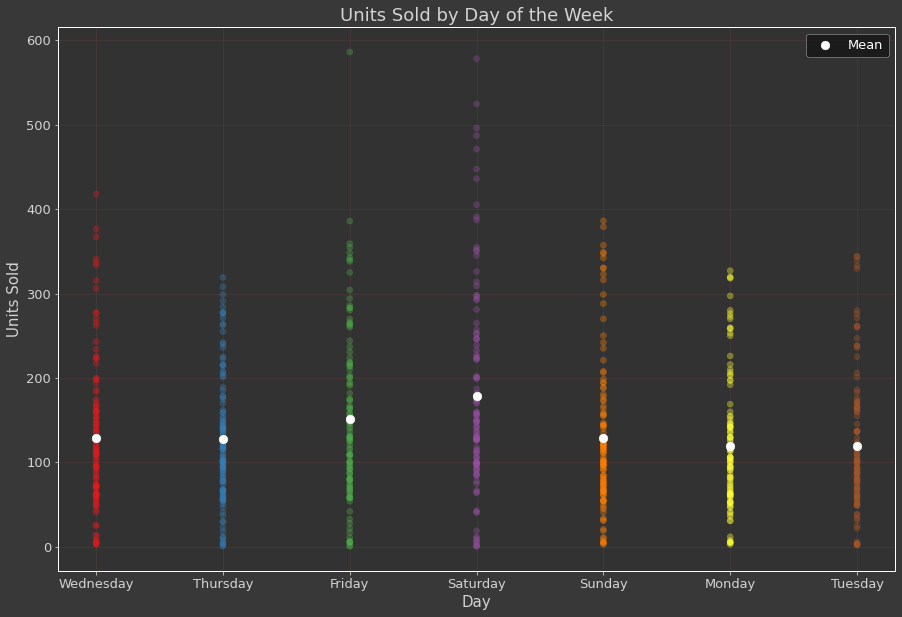

In [93]:
# Finding most popular days
fig, axs = plt.subplots(figsize = (15, 10))

# Mapping Colors
rgb_values = sns.color_palette("Set1", 7)
color_labels = post_model_df['DAY'].unique()
color_map = dict(zip(color_labels, rgb_values))

axs.scatter(post_model_df.index.day_name(), post_model_df['UNITS'], alpha = 0.35, c = post_model_df['DAY'].map(color_map))
axs.scatter(x = post_model_df.groupby(['DAY']).mean().index, y = post_model_df.groupby(['DAY']).mean()['UNITS'], 
            s = 75, c = 'white', label = 'Mean')
axs.set_xlabel('Day')
axs.set_ylabel('Units Sold')
axs.set_title('Units Sold by Day of the Week', size = 18)
axs.legend()
fig.show()

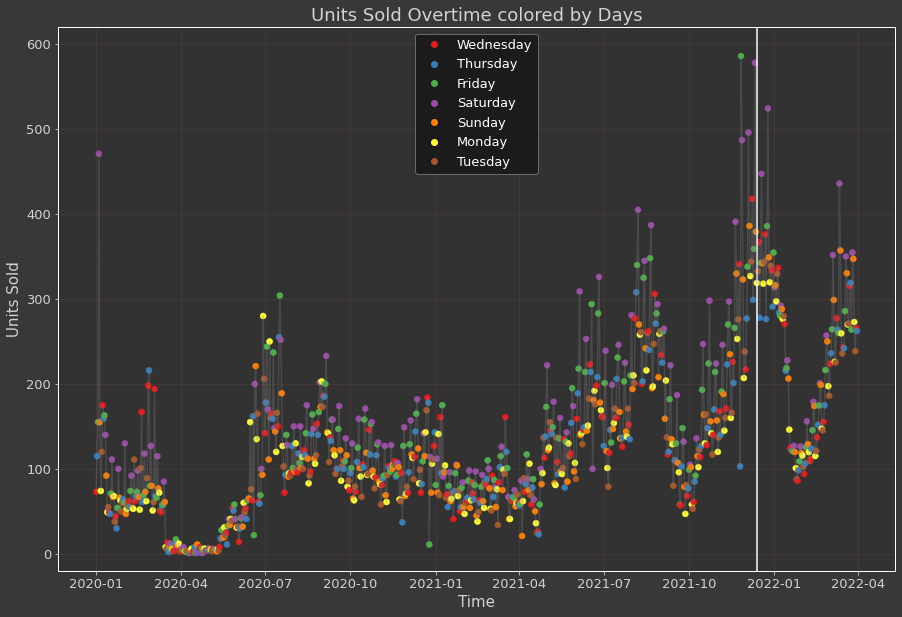

In [97]:
# Regular Time vs. Units Sold colored by Days
fig, axs = plt.subplots(figsize = (15, 10))

# Mapping Colors
rgb_values = sns.color_palette("Set1", 7)
color_labels = post_model_df['DAY'].unique()
color_map = dict(zip(color_labels, rgb_values))

axs.scatter(post_model_df.index, post_model_df['UNITS'], alpha = 1, c = post_model_df['DAY'].map(color_map))
axs.plot(post_model_df.index, post_model_df['UNITS'], alpha = 0.3, c = 'grey')

axs.set_xlabel('Time')
axs.set_ylabel('Units Sold')
axs.set_title('Units Sold Overtime colored by Days', size = 18)
axs.vlines(pd.to_datetime('2021-12-13'), ymin = -100, ymax = 650, color = 'White')
axs.set_ylim(-20, 620)
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
plt.legend(markers, color_map.keys(), numpoints=1)
fig.show()

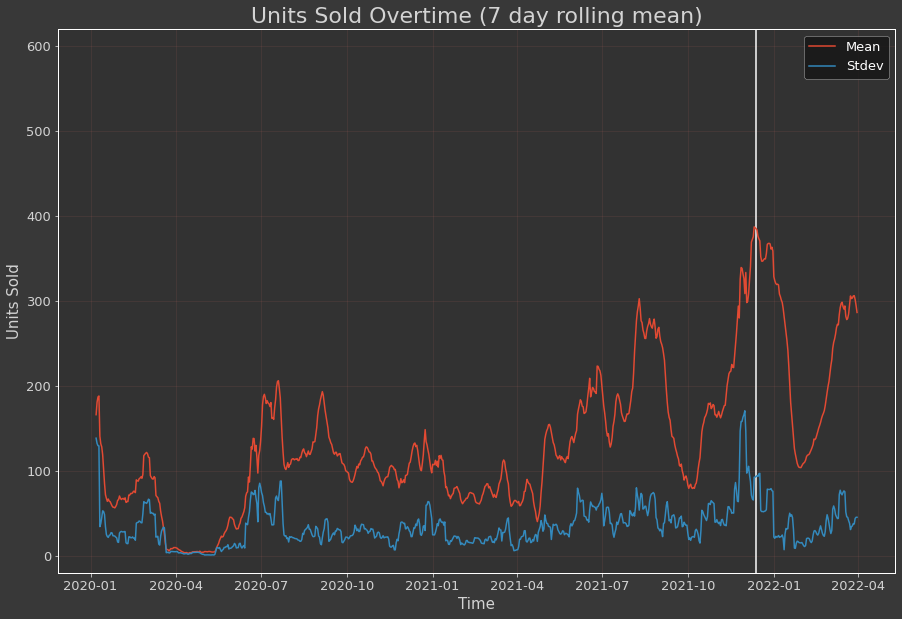

In [96]:
# Plotting 7 day rolling mean and std
fig, axs = plt.subplots()

rolling_7mean = post_model_df['UNITS'].rolling(7).mean()
rolling_7std = post_model_df['UNITS'].rolling(7).std()
axs.plot(post_model_df.index, rolling_7mean, label = 'Mean')
axs.plot(post_model_df.index, rolling_7std, label = 'Stdev')
axs.set_xlabel('Time')
axs.set_ylabel('Units Sold')
axs.set_title('Units Sold Overtime (7 day rolling mean)', size = 22)
axs.vlines(pd.to_datetime('2021-12-13'), ymin = -100, ymax = 650, color = 'White')
axs.set_ylim(-20, 620)
axs.legend()
fig.show()